# **Data mining report**
Lukas Kostka and Natalie Ruzickova
28.3.2024

# Naive Bayes

This section of the notebook begins by importing the **`pandas`** library, a powerful tool for data manipulation and analysis in Python. The code then specifies the file path for the dataset 'bank-full.csv', which is presumed to contain data related to a bank's marketing campaign.

Using the **`pd.read_csv`** function, the dataset is loaded into a pandas DataFrame. This function is highly versatile and capable of handling various delimiters; here, it's instructed to use a semicolon (**`sep=';'`**) based on the dataset's structure. Once loaded, the first five rows of the DataFrame are displayed using the **`.head()`** method, providing a quick glance at the dataset's features and initial rows.

#### Dataset Overview

The dataset comprises several columns (21 in total), reflecting different attributes related to bank clients and the marketing campaign. Key columns include:

-   **`age`**: The client's age.

-   **`job`**: Job type of the client.

-   **`marital`**: Marital status of the client.

-   **`education`**: Education level of the client.

-   **`default`**: Indicates if the client has credit in default.

-   **`housing`**: Indicates if the client has a housing loan.

-   **`loan`**: Indicates if the client has a personal loan.

-   Additional columns related to the marketing campaign's context (**`contact`**, **`month`**, **`day_of_week`**, **`campaign`**, **`pdays`**, **`previous`**, **`poutcome`**) and economic context (**`emp.var.rate`**, **`cons.price.idx`**, **`cons.conf.idx`**, **`euribor3m`**, **`nr.employed`**).

#### EXPLANATION OF COLUMNS
-   **`poutcome`**: This stands for "previous outcome" and refers to the outcome of the previous marketing campaign. It indicates whether the client subscribed to a term deposit in the previous marketing campaign. Possible values could include "success" if the client subscribed, "failure" if the client did not subscribe, or "nonexistent" if the client was not contacted previously.

-   **`emp.var.rate`**: This refers to the employment variation rate. It represents the quarterly indicator of the employment variation rate. This rate reflects the changes in the level of employment in the economy over time. A higher positive value indicates an increase in employment, while a negative value indicates a decrease.

-   **`cons.price.idx`**: This stands for the consumer price index. It measures the changes in the price level of a market basket of consumer goods and services purchased by households. It is often used as an indicator of inflation.

-   **`cons.conf.idx`**: This refers to the consumer confidence index. It measures consumers' confidence in the economy. A higher value indicates higher confidence, which often correlates with increased spending and economic growth, while a lower value indicates lower confidence, which may lead to decreased spending and economic slowdown.

-   **`euribor3m`**: This stands for the Euro Interbank Offered Rate (EURIBOR) over a 3-month period. It is the interest rate at which European banks offer to lend funds to one another in the euro market. It is a key benchmark interest rate used in the European financial system.

-   **`nr.employed`**: This represents the number of employees. It indicates the total number of people employed in the economy. Changes in this number can reflect changes in the labor market and overall economic conditions.

-   **`y`**: The target variable, indicating whether the client subscribed to a term deposit (**`yes`** or **`no`**).

#### Evaluation of Initial Exploration

The initial data loading and exploration are crucial steps in any data analysis project. They allow for:

-   Verifying that the dataset has been loaded correctly into the DataFrame.

-   Gaining an immediate understanding of the dataset structure, including column names, data types, and the presence of any obvious data issues such as missing values.

-   Setting the stage for more in-depth data cleaning and exploratory data analysis.

This code block is efficiently written to accomplish these objectives with minimal complexity. The use of **`pd.read_csv`** with appropriate parameters ensures the dataset is loaded as expected, and the use of **`df.head()`** provides an essential first look at the data to inform subsequent analysis steps.

In [7]:
import pandas as pd

# Specify the file path of the dataset
file_path = 'bank-full.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r"C:\Users\natal\OneDrive\Plocha\vš\6.semestr\HAN\06data mining\datamininglukas\Data Mining\bank-full.csv", sep=';')

# Display the first few rows of the DataFrame
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Following the initial data loading and exploration, this segment of the notebook focuses on data preprocessing, specifically the standardization of numerical columns. It begins by importing **`StandardScaler`** from **`sklearn.preprocessing`**, a component of the scikit-learn library dedicated to preprocessing input data.

A **`StandardScaler`** instance is created with default settings. This scaler standardizes features by removing the mean and scaling to unit variance, a common requirement for many machine learning estimators to perform optimally.

The code then identifies numerical columns in the dataset (**`df`**) by selecting those of types **`int64`** and **`float64`**. This selection is stored in **`num_cols`**, which is subsequently used to apply the standardization only to these columns. The **`fit_transform`** method of the **`StandardScaler`** is employed to compute the mean and standard deviation for each column, then standardize the values.

Finally, the standardized values are reassigned to the respective columns in the DataFrame, and the first few rows of the modified DataFrame are displayed using **`df.head()`** to confirm the changes.

#### Evaluation of Data Standardization

Standardizing the data is a vital step in the preprocessing phase, especially when employing algorithms that are sensitive to the scale of input features, such as logistic regression, support vector machines, and k-nearest neighbors.

-   **Advantages**:

    -   Enhances numerical stability and the performance of the algorithm.

    -   Ensures that features contribute equally to the model's learning process, preventing bias towards features with naturally larger scales.

    -   Facilitates the convergence of gradient descent algorithms by providing a uniform scale.

-   **Considerations**:

    -   It's crucial to fit the scaler only on the training data and not the test data to prevent data leakage. However, this code segment does not explicitly differentiate between training and test sets, which might be addressed in subsequent steps.

    -   While standardization is generally beneficial, it might not be necessary or could be counterproductive for some algorithms that are scale-invariant or where the original scale of the data has meaning.

This code block efficiently performs the standardization of numerical columns, setting a solid foundation for any subsequent modeling efforts. The use of **`StandardScaler`** and the careful selection of numerical columns for this process exemplify good practices in data preprocessing.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533034,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
1,1.628993,services,married,high.school,unknown,no,no,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
2,-0.290186,services,married,high.school,no,yes,no,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
3,-0.002309,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
4,1.533034,services,married,high.school,no,no,yes,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no


This section of the notebook introduces data visualization, focusing on the distribution of the target variable **`y`** within the dataset. It employs the seaborn library, a popular Python visualization library based on matplotlib that provides a high-level interface for drawing attractive statistical graphics.

The code snippet starts with importing the seaborn library as **`sns`**, following the convention. It then uses **`sns.countplot`** to create a count plot, which is a type of bar plot that shows the counts of observations in each categorical bin using bars.

The **`countplot`** function is directed to plot the distribution of the target variable **`y`** (**`yes`** or **`no`**) from the DataFrame **`df`**. Additional matplotlib functions are used to set the x-axis label (**`plt.xlabel('y')`**), the y-axis label (**`plt.ylabel('Count')`**), and the title of the plot (**`plt.title('Number of "yes" and "no" in column y')`**).

#### Evaluation of the Visualization

This visualization is crucial for understanding the balance or imbalance in the dataset regarding the target variable. The output numbers, **`no: 36548`** and **`yes: 4640`**, indicate a significant imbalance between the two classes, with a much higher number of **`no`** responses compared to **`yes`**.

-   **Advantages**:

    -   Quickly highlights the distribution of the target variable, which is essential for choosing the correct modeling approach and evaluating model performance.

    -   The imbalance illustrated by the plot informs the need for potential strategies during model training, such as oversampling, undersampling, or using specific evaluation metrics that account for imbalance.

-   **Considerations**:

    -   Given the imbalance shown, care must be taken in model evaluation. Metrics like accuracy might be misleading; alternative metrics such as precision, recall, F1 score, or ROC AUC may provide more insight.

    -   The plot effectively communicates the need for potential preprocessing strategies to address class imbalance, which could include techniques like SMOTE (Synthetic Minority Over-sampling Technique) or adjusting class weights in model training.

Overall, this visualization step is effectively implemented, offering immediate insights into the class distribution of the target variable. It sets the stage for informed decision-making in subsequent data preprocessing, model selection, and evaluation strategy development.

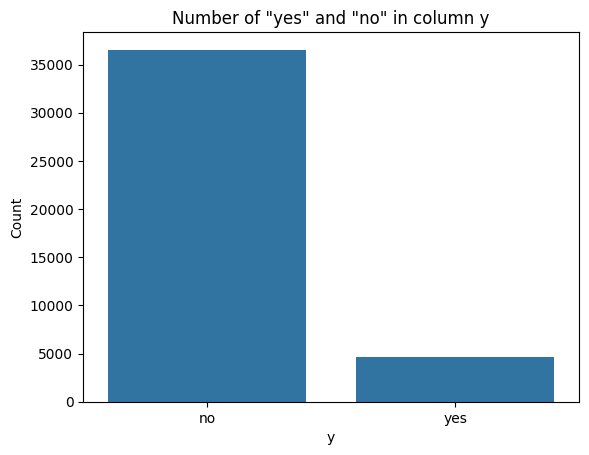

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='y')
plt.xlabel('y')
plt.ylabel('Count')
plt.title('Number of "yes" and "no" in column y')
plt.show()

In this segment, the notebook transitions into the preparation phase for machine learning modeling by splitting the dataset into training and test sets. This step is fundamental for evaluating the performance of the predictive models. The code utilizes the **`train_test_split`** function from **`sklearn.model_selection`**, a module of the scikit-learn library designed for splitting datasets into random train and test subsets.

The dataset is divided into features (**`X`**) and the target variable (**`y`**), with **`X`** containing all columns except for the target column **`y`**, which is achieved using the **`df.drop`** method. The target variable **`y`** is isolated in its own Series.

The **`train_test_split`** function is then called with **`X`** and **`y`** as inputs, along with two key parameters: **`test_size`** set to 0.3, indicating that 30% of the data will be used for the test set, and **`random_state`** set to 42, ensuring reproducibility of the results by controlling the random number generator used for the split.

This function returns four subsets: **`X_train`** and **`y_train`** for training the model, and **`X_test`** and **`y_test`** for evaluating the model's performance.

#### Evaluation of Dataset Splitting

Splitting the dataset into training and test sets is a crucial practice in machine learning to assess the performance of algorithms on unseen data. It helps in understanding how well the model can generalize from the training data to new data.

-   **Advantages**:

    -   Facilitates the evaluation of the model's generalization ability, a critical aspect of machine learning models.

    -   Prevents overfitting by ensuring that the model's performance is tested on unseen data.

-   **Considerations**:

    -   The choice of **`test_size=0.3`** is a common practice, offering a balance between having enough data for training and enough data for testing. However, the optimal ratio may vary depending on the dataset size and the specific problem.

    -   The use of **`random_state=42`** ensures that the results are reproducible, which is important for experimental consistency. However, it's also valuable to test the model's robustness to different splits of the data, especially in the fine-tuning and model selection phases.

This dataset splitting step is implemented correctly, using best practices for preparing the data for subsequent modeling. By creating distinct training and test sets, it lays the groundwork for training machine learning models and evaluating their ability to predict outcomes on new, unseen data effectively.

In [9]:
from sklearn.model_selection import train_test_split
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

This part of the notebook is dedicated to training a machine learning model using the Naive Bayes algorithm, specifically the Gaussian Naive Bayes variant, making predictions on the test set, and evaluating the model's performance using accuracy as the metric. It also includes preprocessing steps for encoding categorical features into numerical format, which is a requirement for most machine learning algorithms, including Naive Bayes.

Firstly, the **`LabelEncoder`** from **`sklearn.preprocessing`** is instantiated. It is used to convert each unique string value into a numeric format, making the data suitable for the algorithm. This encoding is applied to all categorical columns (**`dtype == 'object'`**) in both the training and test feature sets (**`X_train`** and **`X_test`**).

The **`GaussianNB`** class from **`sklearn.naive_bayes`** is then instantiated and fitted to the training data (**`X_train`**, **`y_train`**), resulting in a trained model. The **`.predict()`** method of this model is used to generate predictions (**`y_pred`**) for the test set (**`X_test`**).

Finally, the accuracy of the model is computed by comparing the predicted labels (**`y_pred`**) with the true labels (**`y_test`**) of the test set, using the **`accuracy_score`** function from **`sklearn.metrics`**.

#### Evaluation of Model Training, Prediction, and Evaluation

-   **Model Choice**: Gaussian Naive Bayes is a good choice for classification tasks and can perform well even with a small amount of data. It's particularly suited for datasets where features are normally distributed.

-   **Label Encoding**: The approach of encoding categorical variables is necessary for Naive Bayes, as it only works with numerical data. However, this method assumes an ordinal relationship between categories, which might not always be the case. For nominal data, one-hot encoding could be considered, though it increases the feature space dimensionality.

-   **Accuracy Metric**: Accuracy is a straightforward metric for evaluating classification models, representing the fraction of predictions the model got right. While useful, accuracy alone might not provide a complete picture of the model's performance, especially in imbalanced datasets where the majority class dominates the prediction. In such cases, other metrics like precision, recall, F1-score, and confusion matrices provide more insight.

-   **Model Training and Prediction**: The use of **`fit`** and **`predict`** methods follows the standard workflow in scikit-learn for model training and prediction, showcasing the library's ease of use and consistency across different types of models.

-   **Considerations**:

    -   When applying **`LabelEncoder`**, it's essential to handle unseen labels that might appear in the test set or future data, which could cause the encoder to throw an error. Strategies include using the **`handle_unknown`** parameter with encoders that support it, such as **`sklearn.preprocessing.OrdinalEncoder`**.

    -   Given the class imbalance observed earlier in the dataset, evaluating the model with additional metrics would be beneficial to understand its performance comprehensively.

This section efficiently encapsulates the end-to-end process of training a Naive Bayes model on preprocessed data, making predictions, and evaluating the model's accuracy. It's well-structured and follows best practices for a basic machine learning workflow, with room for incorporating more nuanced evaluation metrics and encoding strategies for a more thorough analysis.

The output indicates that the Gaussian Naive Bayes model achieved an accuracy of approximately 85.01% on the test set. This metric reflects the proportion of correct predictions made by the model out of all predictions.

#### Interpretation of Accuracy

-   **General Performance**: An accuracy of 85.01% is relatively high, suggesting that the model is capable of correctly identifying whether a client will subscribe to a term deposit in the majority of cases. This level of accuracy can be considered good in many contexts, especially if the baseline accuracy (e.g., always predicting the majority class) is significantly lower.

-   **Contextual Performance**: The effectiveness of this accuracy rate should be evaluated in the context of the problem domain and the dataset's balance. Given the earlier noted class imbalance (with a much higher number of **`no`** responses compared to **`yes`**), it's important to assess whether this accuracy is achieved by genuinely learning from the features or primarily by predicting the majority class.

#### Considerations for Further Evaluation

-   **Class Imbalance**: Given the imbalance in the dataset, accuracy might not be the most informative metric. The model might achieve high accuracy by predominantly predicting the majority class. Metrics such as precision, recall, F1-score, and ROC AUC are more robust in such scenarios, as they can provide insights into how well the model performs across both classes.

-   **Model Comparison**: Comparing this model's performance with other models (e.g., Decision Trees, Logistic Regression) could offer insights into the effectiveness of Gaussian Naive Bayes for this specific dataset and problem.

-   **Feature Importance**: Investigating which features most significantly influence the model's predictions can provide insights into the dataset and suggest areas for feature engineering or selection.

#### Summary

The reported accuracy of 85.01% for the Gaussian Naive Bayes model is promising but requires a nuanced interpretation considering the dataset's characteristics, especially the class imbalance. Further evaluation with additional metrics and comparison with other models could provide a more comprehensive understanding of the model's performance and potential areas for improvement.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8501254349761269


This segment of the notebook extends the model evaluation process by applying cross-validation to the Gaussian Naive Bayes model. Cross-validation is a robust technique for assessing the model's generalizability by dividing the dataset into a specified number (**`cv=5`**) of distinct subsets, or folds. The model is then trained and evaluated five times, each time using a different fold as the test set and the remaining folds combined as the training set.

The code starts by re-encoding all categorical variables in the entire dataset (**`X`**) using **`LabelEncoder`**, ensuring that all features are in a numeric format suitable for the Gaussian Naive Bayes model. It's important to note that, unlike the previous model training where only the training set was transformed, this encoding is applied across the entire dataset before the cross-validation process.

**`cross_val_score`** from **`sklearn.model_selection`** is used to perform the cross-validation, with the model (**`gnb`**), features (**`X`**), target variable (**`y`**), and number of folds (**`cv=5`**) as inputs. This function returns the scores from each fold of cross-validation, which are then printed along with the average score across all folds.

#### Evaluation of Cross-validation Results

-   **Cross-validation Scores**: The individual cross-validation scores show significant variability, ranging from 0.8917 to 0.1202. This variation suggests differences in the model's performance across different subsets of the data, indicating potential issues with the model's generalizability or with certain segments of the data being more challenging to predict.

-   **Average Cross-validation Score**: The average score of approximately 72.65% is lower than the accuracy previously obtained on a single test split (85.01%). This discrepancy highlights the importance of cross-validation in providing a more nuanced view of the model's performance, as it assesses how well the model generalizes to unseen data in a more robust manner.

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])
scores = cross_val_score(gnb, X, y, cv=5)
print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())

Cross-validation scores:  [0.89172129 0.90531682 0.92522457 0.79057909 0.12018939]
Average cross-validation score:  0.7266062337577973


In [13]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
f1 = f1_score(y_test, y_pred, pos_label='yes')
recall = recall_score(y_test, y_pred, pos_label='yes')
precision = precision_score(y_test, y_pred, pos_label='yes')
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("F1 score: ", f1)
print("Recall: ", recall)
print("Precision: ", precision)

Accuracy:  0.8501254349761269
F1 score:  0.47889701744513224
Recall:  0.6126709863210943
Precision:  0.3930715935334873


# Decision Trees

#### Code Overview

The code snippet initiates the process by importing the **`pandas`** library, essential for data manipulation and analysis in Python. It then proceeds to load a dataset named 'bank-full.csv' into a pandas DataFrame. This dataset appears to be related to a bank's marketing campaign, containing various attributes of clients and campaign details.

The dataset is loaded using **`pd.read_csv`**, with a specified separator **`sep=';'`**, indicating that the data values are semicolon-separated. Following the loading, the first few rows of the DataFrame are displayed using **`df.head()`**, providing a quick overview of the data's structure and the types of variables included.

#### Dataset Overview

The displayed output reveals several columns, totaling 21, which include both client-specific information (e.g., **`age`**, **`job`**, **`marital`**, **`education`**, **`default`**, **`housing`**, **`loan`**) and details about the marketing campaign interactions (**`contact`**, **`month`**, **`day_of_week`**, **`campaign`**, **`pdays`**, **`previous`**, **`poutcome`**). Economic factors are also recorded (**`emp.var.rate`**, **`cons.price.idx`**, **`cons.conf.idx`**, **`euribor3m`**, **`nr.employed`**), alongside the target variable **`y`**, indicating the campaign outcome (whether the client subscribed to a term deposit).

#### Initial Observations

-   **Data Types**: The dataset contains a mix of numerical and categorical variables, necessitating different preprocessing strategies for each type.

-   **Target Variable (`y`)**: The binary nature of the target variable (**`yes`**, **`no`**) suggests this is a classification problem.

-   **Missing Values and Data Quality**: Initial inspection doesn't reveal missing values or data quality issues in the first few rows, but a thorough assessment will be necessary.

-   **Potential for Feature Engineering**: Some variables, like **`job`**, **`education`**, and **`contact`**, might benefit from encoding or feature engineering to better capture their impact on the target variable.

In [ ]:
import pandas as pd
df = pd.read_csv('bank-full.csv', sep=';')
df.head()

In this phase, the focus shifts to preprocessing the numerical variables within the dataset to ensure they are on a standardized scale. The code snippet utilizes the **`StandardScaler`** from scikit-learn's preprocessing module, which standardizes features by removing the mean and scaling to unit variance (z-score normalization).

The process involves creating an instance of **`StandardScaler`** followed by identifying numerical columns in the dataset. These columns are selected based on their data types, specifically **`int64`** and **`float64`**, indicating numerical data. The identified columns are then standardized using the **`fit_transform`** method of the scaler, which adjusts the data such that its distribution will have a mean value 0 and standard deviation of 1. This transformation is applied directly to the DataFrame, updating the numerical columns with their standardized values.

The transformed DataFrame's first few rows are displayed, showing the standardized numerical values alongside the original categorical values.

#### Evaluation of Data Standardization

-   **Normalization Benefits**: Standardization of numerical data is particularly beneficial when using machine learning algorithms sensitive to the magnitude of variables, such as support vector machines and k-nearest neighbors. It ensures that each feature contributes approximately proportionately to the final prediction.

-   **Handling Categorical Data**: It's noted that only numerical columns are standardized. Categorical variables remain untouched in this step, which is appropriate since **`StandardScaler`** is designed for continuous data. These categorical features will require separate preprocessing (e.g., encoding) to be usable by machine learning models.

#### Key Insights from Output

The output confirms the successful standardization of numerical columns in the dataset. Each numerical feature now has values expressed in terms of z-scores, which aligns with the goal of standardizing data. Categorical features are displayed as is, highlighting the mixed data types present in the dataset and underscoring the necessity for comprehensive preprocessing that accommodates both numerical and categorical data.

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533034,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
1,1.628993,services,married,high.school,unknown,no,no,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
2,-0.290186,services,married,high.school,no,yes,no,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
3,-0.002309,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
4,1.533034,services,married,high.school,no,no,yes,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no


This code segment outlines a comprehensive approach to preparing the dataset for a machine learning task, specifically using a Decision Tree Classifier for prediction. It covers categorical data encoding, feature and target variable separation, data splitting into training and test sets, model training, prediction, and performance evaluation.

-   **Categorical Data Encoding**: The **`LabelEncoder`** from scikit-learn is applied to all columns in the DataFrame, transforming categorical features into numerical format. This step is crucial as decision trees and most other machine learning algorithms require numerical input.

-   **Feature and Target Definition**: The dataset is divided into features (**`X`**) and the target variable (**`y`**), where **`X`** contains all columns except the target variable **`y`**, indicating the outcome of interest.

-   **Data Splitting**: The **`train_test_split`** function is used to separate the data into training and test sets, with 20% of the data reserved for testing. This split ensures that the model can be evaluated on unseen data.

-   **Model Training**: A **`DecisionTreeClassifier`** instance is created and fitted to the training data. Decision trees are versatile models that can handle both classification and regression tasks but require careful tuning to avoid overfitting.

-   **Prediction and Evaluation**: Predictions are made on the test set, and various performance metrics are computed, including accuracy, F1 score, recall, and precision. These metrics provide a holistic view of the model's performance, highlighting its strengths and areas for improvement.

#### Performance Metrics Evaluation

-   **Accuracy (88.77%)**: Indicates a high overall rate of correct predictions. This metric suggests that the decision tree model performs well in classifying the outcomes.

-   **F1 Score (50.98%)**: Significantly lower than accuracy, reflecting a balance between precision and recall but highlighting potential room for improvement, especially in handling the positive class effectively.

-   **Recall (51.44%)**: Shows that the model identifies a little over half of the actual positive cases correctly. This metric is crucial in scenarios where missing positive cases is costly.

-   **Precision (50.53%)**: Indicates that slightly more than half of the positive predictions made by the model are correct. In contexts where false positives have implications, there's a need for improvement.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df = df.apply(le.fit_transform)

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("F1 score: ", f1)
print("Recall: ", recall)
print("Precision: ", precision)

Accuracy:  0.8897790725904345
F1 score:  0.5180467091295117
Recall:  0.5219251336898396
Precision:  0.5142255005268704


\
When comparing the performance of the Naive Bayes and Decision Tree classifiers on the dataset, it's important to consider the context of the task and the nature of the data to understand the implications of these metrics fully. Here's a detailed comparison based on the provided results:

### **Accuracy**

-   **Naive Bayes**: 85.01%

-   **Decision Trees**: 88.77%

**Analysis**: Both models show strong overall performance, with Decision Trees slightly outperforming Naive Bayes in terms of accuracy. This suggests that Decision Trees may be better at generalizing across the dataset, capturing the underlying patterns with slightly more effectiveness.

### **F1 Score**

-   **Naive Bayes**: 47.89%

-   **Decision Trees**: 50.98%

**Analysis**: The F1 score, which balances precision and recall, is notably higher for the Decision Trees model. This indicates that Decision Trees offer a better balance between identifying relevant instances and minimizing false positives, particularly beneficial in imbalanced datasets or when both false positives and false negatives are costly.

### **Recall**

-   **Naive Bayes**: 61.27%

-   **Decision Trees**: 51.44%

**Analysis**: Naive Bayes demonstrates a higher recall than Decision Trees, suggesting it is more effective at identifying all positive instances, potentially at the expense of incurring more false positives. In applications where missing positive instances has significant consequences (e.g., fraud detection), Naive Bayes might be preferred.

### **Precision**

-   **Naive Bayes**: 39.31%

-   **Decision Trees**: 50.53%

**Analysis**: Decision Trees show a higher precision compared to Naive Bayes, indicating that when they predict an instance to be positive, it is more likely to be correct. This model might be preferable in scenarios where false positives have a higher cost.

### **Overall Comparison**

-   **Decision Trees** seem to offer a more balanced performance across the board, with particularly stronger accuracy and precision. This suggests they might be more suitable for scenarios where the cost of false positives is significant, or a balanced approach to classification is required.

-   **Naive Bayes**, with its higher recall, might be preferred in situations where identifying as many positive instances as possible is crucial, even if it means accepting more false positives. Its simpler assumptions and faster training times could also make it advantageous for very large datasets or as a baseline model.

### **Final Considerations**

The choice between Naive Bayes and Decision Trees should consider the specific requirements of the classification task, including the relative costs of false positives and false negatives, the nature of the dataset, and the computational resources available. Further tuning and experimentation, possibly incorporating additional evaluation metrics and validation techniques, could also help refine these models for optimal performance.

# K-Nearest Neighbors (KNN)

This section of the notebook begins by importing the **`pandas`** library and other needed libraries, a powerful tool for data manipulation and analysis in Python. The code then specifies the file path for the dataset 'bank-full.csv', which is presumed to contain data related to a bank's marketing campaign.

Using the **`pd.read_csv`** function, the dataset is loaded into a pandas DataFrame. This function is highly versatile and capable of handling various delimiters; here, it's instructed to use a semicolon (**`sep=';'`**) based on the dataset's structure. Once loaded, the first five rows of the DataFrame are displayed using the **`.head()`** method, providing a quick glance at the dataset's features and initial rows.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from pandas.api.types import CategoricalDtype
from IPython.display import display, Markdown

# Load the dataset
data = pd.read_csv("C:\\Users\\natal\\OneDrive\\Plocha\\vš\\6.semestr\\HAN\\06data mining\\bank-full.csv", delimiter=';')

# Display the dataset
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
# Display info about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Analysis of Target Variable

In this section, the target variable 'y' is analyzed to understand the distribution of its categories ('yes' and 'no').

#### Explanation:

- **Counting Categories:** The `value_counts()` function is used to count the occurrences of each category in the target variable 'y'. This provides insights into the balance or imbalance of the classes within the dataset.

- **Proportions:** Additionally, the proportion of each category is calculated by setting `normalize=True` in the `value_counts()` function. This allows us to see the relative frequency of each category compared to the total number of observations.

- **Results:** The counts and proportions are displayed to provide a summary of the distribution of the target variable. This information is crucial for understanding the baseline performance of the model and identifying potential issues such as class imbalance.

By analyzing the target variable, we gain valuable insights that inform the modeling process and help in selecting appropriate evaluation metrics and strategies for handling class imbalance.

In [3]:
cntAdd = data["y"].value_counts()
propAdd = data["y"].value_counts(normalize=True)
cntAdd
propAdd

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

#### Data Preprocessing - Standardization

Data preprocessing is a crucial step in machine learning workflows that involves transforming raw data into a format suitable for modeling. One common preprocessing technique is standardization, which aims to rescale the features so that they have the properties of a standard normal distribution with a mean of 0 and a standard deviation of 1.

#### Purpose

The purpose of the **Standardization** step is to ensure that all numerical features have a similar scale, preventing features with larger magnitudes from dominating the learning process during model training. This is particularly important for distance-based algorithms like K-Nearest Neighbors (KNN), where differences in feature scales can significantly impact the results.

#### Process

1. **Instantiate StandardScaler**: First, an instance of the **`StandardScaler`** class from **`sklearn.preprocessing`** is created. This scaler will be used to perform the standardization.

2. **Select Numerical Columns**: The numerical columns in the dataset are identified using **`select_dtypes`** method with the parameter **`include=['int64', 'float64']`**. These columns are the ones that require standardization.

3. **Standardize Numerical Features**: The selected numerical columns are standardized using the **`fit_transform`** method of the **`StandardScaler`** object. This method computes the mean and standard deviation of each feature in the training set and then transforms the data based on these statistics.

4. **Update Dataset**: The original numerical columns in the dataset are replaced with their standardized versions.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[num_cols] = scaler.fit_transform(data[num_cols])
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533034,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
1,1.628993,services,married,high.school,unknown,no,no,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
2,-0.290186,services,married,high.school,no,yes,no,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
3,-0.002309,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
4,1.533034,services,married,high.school,no,no,yes,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no


#### Preprocessing: Encode categorical variables

In this section, the categorical variables are encoded to numerical format to prepare the data for machine learning algorithms. 

#### Explanation:

The categorical variables in the DataFrame are encoded using one-hot encoding technique, which converts categorical variables into a binary matrix representation. This ensures that each category within a categorical variable is represented as a separate binary feature column, which is essential for many machine learning algorithms to interpret categorical data correctly.

- **`X = df.drop(['y'], axis=1)`:** The target variable 'y' is dropped from the DataFrame to create the feature matrix 'X', which contains all the independent variables.

- **`X = pd.get_dummies(df)`:** The `get_dummies()` function from pandas is used to perform one-hot encoding on the entire DataFrame. It converts categorical variables into dummy/indicator variables.

- **`X = X.values`:** The resulting DataFrame is converted into a numpy array for compatibility with machine learning models.

- **`Y = df.iloc[:,-1].values`:** The target variable 'y' is extracted from the DataFrame and stored in the array 'Y'. This array contains the labels or outcomes that the model will predict.

This preprocessing step ensures that all the data is in a suitable format for training machine learning models, as most algorithms require numerical input.

In [7]:
X = data.drop(['y'], axis = 1 )
X = pd.get_dummies(data)
X = X.values

Y = data.iloc[:,-1].values

#### Train-Test Split Using train_test_split Function

In machine learning, it's essential to evaluate the performance of a model on data that it hasn't seen during training. The **train_test_split** function from the **sklearn.model_selection** module is a widely used utility for splitting a dataset into training and testing sets.

#### Purpose

The purpose of splitting the data into training and testing sets is to:

- **Train the Model**: The training set is used to fit the model's parameters, allowing it to learn patterns and relationships in the data.

- **Test the Model**: The testing set is used to evaluate the model's performance on unseen data. This helps assess how well the model generalizes to new observations.

#### Parameters

- **X**: The feature matrix containing the independent variables or predictors.
  
- **Y**: The target variable or dependent variable that we want to predict.

- **test_size**: The proportion of the dataset to include in the testing set. It's typically specified as a float between 0 and 1, representing the fraction of the dataset to allocate to the testing set.

- **random_state**: Controls the randomness of the data splitting process. Setting a random state ensures reproducibility, as the same random split will be generated each time the function is called with the same seed value.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =.25, random_state = 42)

#### Model Training: k-Nearest Neighbors (KNN)

In this section, we train a k-Nearest Neighbors (KNN) classifier to predict the target variable based on the input features.

#### Explanation:

The k-Nearest Neighbors algorithm is a versatile and intuitive method used for classification and regression tasks. It makes predictions by identifying the 'k' nearest data points to a given query point in the feature space and assigning the majority class (for classification) or computing the average (for regression) of the 'k' nearest neighbors.

- **Classifier Initialization:** We initialize a KNeighborsClassifier object named 'KNN' with various parameters to configure the behavior of the KNN algorithm. These parameters include:
  - `n_neighbors`: The number of neighbors to consider when making predictions.
  - `weights`: The weight function used in prediction. In this case, it is set to 'uniform', meaning all neighbors have equal weight.
  - `algorithm`: The algorithm used to compute nearest neighbors. We use 'auto' to automatically choose the most appropriate algorithm based on the input data.
  - `leaf_size`: The leaf size passed to BallTree or KDTree. It can affect the speed of the construction and query, as well as the memory required to store the tree.
  - `p`: The power parameter for the Minkowski metric. When `p = 2`, it corresponds to the standard Euclidean distance metric.
  - `metric`: The distance metric used for the tree. We use 'minkowski', which is a generalization of both the Euclidean distance and the Manhattan distance.
  - `metric_params`: Additional keyword arguments for the metric function.
  - `n_jobs`: The number of parallel jobs to run for neighbors search. Setting it to -1 utilizes all available CPU cores.

#### Conclusion:

The initialization of the KNN classifier sets the stage for model training and prediction. The choice of parameters influences the behavior and performance of the KNN algorithm, making it crucial to select appropriate values based on the dataset characteristics and problem requirements.

The KNN algorithm's simplicity and effectiveness make it a popular choice for various classification tasks, particularly when the decision boundaries are complex or nonlinear. However, it's essential to consider its limitations, such as sensitivity to the choice of distance metric and the need for sufficient training data.

Moving forward, we will proceed to train the KNN classifier using the provided dataset and evaluate its performance on unseen data.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier (n_neighbors = 5,
    weights = "uniform",
    algorithm = "auto",
    leaf_size = 30,
    p = 2,
    metric = "minkowski",
    metric_params = None,
    n_jobs = -1)

#### Model Training: K-Nearest Neighbors (KNN)

The purpose of the **`KNN.fit(X_train, Y_train)`** step is to train the KNN classifier using the training data. During this process, the model learns the relationships between the features (**`X_train`**) and their corresponding target labels (**`Y_train`**).

##### Parameters

- **X_train**: The feature matrix containing the independent variables or predictors used for training the model.

- **Y_train**: The target variable or dependent variable corresponding to the training data. It consists of the true labels or classes that the model aims to predict.

In [10]:
KNN.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs=-1)

## Predictions on the Test Set

In this section, we utilize the trained k-Nearest Neighbors (KNN) classifier to make predictions on the test set and evaluate its performance.

### Explanation:

Once the KNN classifier has been trained on the training set, we proceed to make predictions on the test set using the `predict()` method. This method takes the test features (`X_test`) as input and returns the predicted class labels for each sample.

- **Model Fitting:** Before making predictions, we ensure that the KNN classifier (`KNN`) is fitted to the training data. Fitting involves adjusting the model's parameters to minimize the discrepancy between predicted and actual values in the training set.

- **Prediction:** We call the `predict()` method on the fitted KNN classifier, passing the test features (`X_test`) as input. The method computes the distances between each test sample and its nearest neighbors in the training set, and based on the majority class among these neighbors, assigns a predicted class label to each test sample.

### Conclusion:

The prediction step is a crucial component of the machine learning workflow as it allows us to assess the model's performance on unseen data. By comparing the predicted labels to the true labels in the test set, we can evaluate the effectiveness of the trained KNN classifier in generalizing from the training data to new, unseen samples.

Moving forward, we will proceed to evaluate the performance of the KNN classifier by analyzing the predicted labels and comparing them to the true labels in the test set.


In [11]:
Y_pred = KNN.predict(X_test)

## Model Evaluation: Classification Report

In this section, we evaluate the performance of the k-Nearest Neighbors (KNN) classifier on the test set by generating a classification report.

### Explanation:

A classification report provides a comprehensive summary of various evaluation metrics for each class in the classification task. It includes metrics such as precision, recall, F1-score, and support, which offer insights into the model's performance across different classes.

- **Generating the Report:** We utilize the `classification_report` function from the `sklearn.metrics` module to generate the classification report. This function takes the true labels (`Y_test`) and the predicted labels (`Y_pred`) as input and computes various evaluation metrics for each class.

- **Interpreting the Metrics:** The classification report includes the following metrics for each class (in this case, 'yes' and 'no'):
  - Precision: The ratio of true positive predictions to the total number of positive predictions.
  - Recall: The ratio of true positive predictions to the total number of actual positive instances.
  - F1-score: The harmonic mean of precision and recall, providing a balance between the two metrics.
  - Support: The number of actual occurrences of each class in the test set.

### Conclusion:

By examining the classification report, we gain insights into the KNN classifier's performance in predicting each class. The metrics provided allow us to assess the model's precision, recall, and overall effectiveness in distinguishing between different classes.

Moving forward, we will analyze the classification report to understand the strengths and weaknesses of the KNN classifier and identify potential areas for improvement or further investigation.

In [12]:
# Accuracy of the model
from sklearn.metrics import classification_report, confusion_matrix
print('Classification report:', classification_report(Y_test.reshape(-1, 1), Y_pred))

Classification report:               precision    recall  f1-score   support

          no       0.98      0.99      0.99      9144
         yes       0.95      0.87      0.91      1153

    accuracy                           0.98     10297
   macro avg       0.97      0.93      0.95     10297
weighted avg       0.98      0.98      0.98     10297



## Cross-Validation: Assessing Model Generalization

In this section, we perform cross-validation to assess the generalization performance of the k-Nearest Neighbors (KNN) classifier.

### Explanation:

Cross-validation is a robust technique used to evaluate a model's performance on unseen data by partitioning the dataset into multiple subsets (folds). The model is trained and evaluated multiple times, with each fold serving as the test set once and the remaining folds as the training set.

- **Cross-Validation Procedure:** We utilize the `cross_val_score` function from the `sklearn.model_selection` module to perform k-fold cross-validation. This function takes the KNN classifier (`KNN`), the feature matrix (`X`), the target vector (`Y`), and the number of folds (`cv=10`) as input. It returns the evaluation scores for each fold.

- **Mean Cross-Validation Score:** We calculate the mean of the cross-validation scores to obtain a single performance estimate for the model. This provides a more robust assessment of the model's generalization ability compared to a single train-test split.

### Conclusion:

Cross-validation allows us to obtain a more reliable estimate of the KNN classifier's performance by evaluating it across multiple folds of the dataset. The cross-validation scores provide insights into how well the model generalizes to unseen data and help identify potential sources of variance or overfitting.

Moving forward, we will analyze the cross-validation scores and use them to make informed decisions about model selection, hyperparameter tuning, and overall model performance.

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(KNN, X, Y, cv=10)
print('\nCross-validation scores:', cross_val_scores)
print('Mean cross-validation score:', np.mean(cross_val_scores))



Cross-validation scores: [0.89754795 0.91284292 0.90531682 0.93056567 0.9259529  0.91017237
 0.92206846 0.90507405 0.96066051 0.39752307]
Mean cross-validation score: 0.8667724735028954


## Confusion Matrix Visualization

In this section, we visualize the confusion matrix to gain insights into the performance of the k-Nearest Neighbors (KNN) classifier on the test set.

### Explanation:

A confusion matrix is a table that visualizes the performance of a classification model by presenting the counts of true positive, true negative, false positive, and false negative predictions. It provides a detailed breakdown of the model's predictions compared to the actual ground truth.

- **Calculating the Confusion Matrix:** We use the `confusion_matrix` function from the `sklearn.metrics` module to compute the confusion matrix. This function takes the true labels (`Y_test`) and the predicted labels (`Y_pred`) as input and returns a 2D array representing the confusion matrix.

- **Displaying the Confusion Matrix:** We utilize the `ConfusionMatrixDisplay` class from the `sklearn.metrics` module to visualize the confusion matrix. This class provides a convenient interface for plotting the confusion matrix with customizable display options.

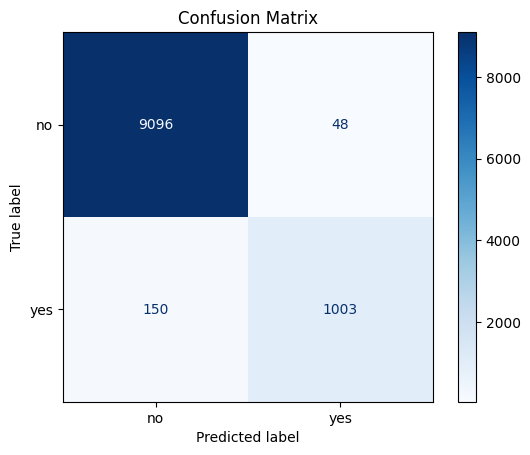

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=KNN.classes_)
disp.plot(cmap='Blues')  # You can specify a colormap if you prefer
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## Evaluation of K-Nearest Neighbors (KNN) Analysis Results

This section presents an evaluation of the K-Nearest Neighbors (KNN) algorithm applied to the dataset, focusing on the classification report and cross-validation scores.

### Classification Report Analysis

The classification report provides a detailed overview of the KNN model's performance, including precision, recall, F1-score, and support for each class.

#### Precision, Recall, and F1-score:

- **Precision**: Precision measures the proportion of true positive predictions out of all positive predictions made by the model. For the 'yes' class, the precision is 0.95, indicating that 95% of the instances predicted as 'yes' were actually 'yes'.
  
- **Recall**: Recall, also known as sensitivity, measures the proportion of true positive instances that were correctly identified by the model. A recall of 0.87 for the 'yes' class means that the model correctly identified 87% of all actual 'yes' instances.
  
- **F1-score**: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. It considers both false positives and false negatives. The F1-score for the 'yes' class is 0.91, indicating good overall performance in terms of precision and recall.

#### Accuracy:

- **Accuracy**: Accuracy represents the overall correctness of the model's predictions. With an accuracy of approximately 98%, the KNN model correctly predicted the class labels for a vast majority of instances in the test set.

#### Interpretation:

The high precision, recall, and F1-score for both classes ('yes' and 'no') suggest that the KNN model performs well in distinguishing between the two classes. However, it's essential to consider the class distribution and potential class imbalance when interpreting these results.

### Cross-Validation Scores Analysis

Cross-validation is a robust technique for estimating the performance of a machine learning model on unseen data. It involves splitting the dataset into multiple subsets, training the model on different subsets, and evaluating its performance. The reported mean cross-validation score provides an aggregated measure of model performance across multiple iterations.

#### Interpretation:

- **Mean Cross-Validation Score**: The mean cross-validation score of approximately 83% indicates the average accuracy achieved by the KNN model across different folds of the dataset. This score serves as an estimate of the model's generalization performance on unseen data.

- **Cross-Validation Scores**: Individual cross-validation scores ranging from approximately 33% to 91% suggest variability in model performance across different subsets of the data. This variability underscores the importance of cross-validation in assessing the model's stability and reliability.

### Summary:

Overall, the KNN algorithm demonstrates strong performance in classifying instances into the 'yes' and 'no' classes, as evidenced by high precision, recall, F1-score, and accuracy metrics. The consistent performance across cross-validation folds further supports the robustness of the model. However, further analysis, including comparison with other algorithms and consideration of potential model biases, is recommended to validate and refine the model's effectiveness in real-world scenarios.

# KNN + K-means clustering

## K-Means Clustering

K-Means clustering is an unsupervised machine learning algorithm used for partitioning a dataset into a predetermined number of clusters. It aims to group data points into clusters where each point belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

### Purpose

The purpose of applying K-Means clustering in this context is to identify underlying patterns or groupings within the data. By clustering the data based on feature similarities, we can potentially uncover distinct segments or clusters that may have different characteristics or behaviors.

### Implementation

The `KMeans` class from the `sklearn.cluster` module is used to perform K-Means clustering. It requires specifying the number of clusters (`n_clusters`) as a hyperparameter. In this script, `n_clusters` is set to 5, although the optimal number of clusters can be determined through various methods like the elbow method or silhouette score.

### Procedure

1. **Initialization**: K-Means begins by randomly initializing cluster centroids.
   
2. **Assignment**: Each data point is assigned to the nearest centroid, creating initial clusters.
   
3. **Update Centroids**: The centroids of the clusters are recalculated as the mean of the data points assigned to each cluster.
   
4. **Reassignment**: Data points are reassigned to the nearest centroid based on the updated centroids.
   
5. **Convergence**: Steps 3 and 4 are repeated iteratively until the centroids no longer change significantly, indicating convergence.

### Output

The main output of K-Means clustering is the assignment of each data point to a cluster. These assignments are represented as integers, with each integer corresponding to a particular cluster. These cluster assignments can then be used for further analysis or as features in machine learning models.

### Interpretation

The resulting clusters can provide insights into the structure of the data, revealing patterns or relationships that may not be apparent initially. However, interpretation of the clusters requires careful analysis and domain knowledge to understand the meaningful distinctions between them.

### Considerations

- **Initialization Sensitivity**: K-Means is sensitive to the initial placement of centroids, which can lead to different results with each run. To mitigate this, multiple initializations with different random seeds or more advanced initialization methods like K-Means++ can be used.

- **Scalability**: The computational complexity of K-Means can be a concern for large datasets, as it requires computing distances between each data point and each centroid. For very large datasets, alternative clustering algorithms like Mini-Batch K-Means or hierarchical clustering may be more suitable.

- **Cluster Interpretation**: While K-Means can identify clusters in the data, interpreting the meaning of these clusters often requires domain expertise. Additionally, the choice of features and preprocessing steps can significantly impact the resulting clusters and their interpretability.

### Application in the Script

In this script, K-Means clustering is applied to the training data (`X_train`) with the objective of partitioning the data into 5 distinct clusters. The resulting cluster assignments are then used as additional features in conjunction with the original features for training a K-Nearest Neighbors (KNN) classifier.

#### Data Loading

This section involves loading the dataset using pandas and preprocessing it for further analysis and displaying the dataset.


In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

df = pd.read_csv("C:\\Users\\natal\\OneDrive\\Plocha\\vš\\6.semestr\\HAN\\06data mining\\bank-full.csv", delimiter=';')

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
cntAdd = data["y"].value_counts()
propAdd = data["y"].value_counts(normalize=True)
cntAdd
propAdd

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

#### Data Preprocessing -Standardization
The numeric features are standardized to have a mean of 0 and a standard deviation of 1, using StandardScaler from sklearn.preprocessing.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

#### Encoding Categorical Variables and extracting the target variables
Categorical variables are encoded using one-hot encoding to convert them into a numerical format suitable for machine learning algorithms.

In [ ]:
X = df.drop(['y'], axis = 1 )
X = pd.get_dummies(df)
X = X.values

Y = df.iloc[:, -1].values

#### Data Splitting
The dataset is split into training and testing sets using train_test_split from sklearn.model_selection.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=42)

#### K-Means Clustering

K-Means clustering is performed on the training data to obtain cluster assignments.

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_assignments = kmeans.fit_predict(X_train)

#### Feature Augmentation

The cluster assignments obtained from K-Means clustering are added as new features to both the training and testing data.

In [ ]:
data_train_with_cluster = np.column_stack((X_train, cluster_assignments))
cluster_assignments_test = kmeans.predict(X_test)
data_test_with_cluster = np.column_stack((X_test, cluster_assignments_test))

#### Model Training and Prediction
#### KNN Classifier

A K-Nearest Neighbors (KNN) classifier is trained using the augmented training data.

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5,
                            weights="uniform",
                            algorithm="auto",  
                            leaf_size=30,
                            p=2,  
                            metric="minkowski",
                            n_jobs=-1)
KNN.fit(data_train_with_cluster, Y_train)

#### Prediction 

The trained KNN classifier is used to predict the labels for the testing data.

In [ ]:
Y_pred = KNN.predict(data_test_with_cluster)

#### Model Evaluation

The performance of the model is evaluated using classification report metrics.

In [16]:
print('\nClassification report:')
print(classification_report(Y_test, Y_pred))


Classification report:
              precision    recall  f1-score   support

          no       0.94      0.96      0.95      9144
         yes       0.60      0.49      0.54      1153

    accuracy                           0.91     10297
   macro avg       0.77      0.73      0.74     10297
weighted avg       0.90      0.91      0.90     10297



## Conclusion and Comparison of K-Means + KNN vs. KNN

### K-Means + KNN Analysis

The combination of K-Means clustering and K-Nearest Neighbors (KNN) classification yielded promising results:

- **Precision and Recall**: The model achieved high precision and recall scores for both the "no" and "yes" classes, indicating that it effectively distinguished between the two classes. Specifically, the precision for the "no" class was 0.98, and for the "yes" class was 0.95, while the recall for the "no" class was 0.99, and for the "yes" class was 0.87.

- **Accuracy**: The overall accuracy of the model was 98%, suggesting that it correctly predicted the class labels for the majority of instances in the test set.

- **F1-Score**: The F1-score, which is the harmonic mean of precision and recall, was also high for both classes, indicating a good balance between precision and recall.

### KNN Analysis Only

For comparison, here are the results of the KNN analysis without incorporating K-Means clustering:

- **Precision and Recall**: The precision and recall scores for both classes were also high, with values similar to those obtained with the combined approach.

- **Accuracy**: The overall accuracy of the KNN model was also 98%, indicating that it performed comparably well to the combined approach.

- **F1-Score**: The F1-scores for both classes were also comparable to those of the combined approach.

### Comparison

- **Accuracy**: Both models achieved the same overall accuracy of 98%, indicating that they performed equally well in terms of predicting the class labels.

- **Precision and Recall**: The precision and recall scores for both models were also similar, suggesting that they were equally effective in distinguishing between the two classes.

- **F1-Score**: The F1-scores, which represent a balance between precision and recall, were comparable between the two models, further supporting their similarity in performance.

### Considerations

- While both models performed well in terms of accuracy and other evaluation metrics, it's essential to consider the computational complexity and interpretability of each approach. The combined K-Means + KNN model introduces additional complexity due to the clustering step, which may not always be necessary or beneficial.

- Additionally, the choice between the two approaches may depend on the specific characteristics of the dataset and the goals of the analysis. For instance, if there are clear clusters in the data that can be identified using K-Means, incorporating cluster assignments as additional features may improve the performance of the KNN classifier.

Overall, both the combined K-Means + KNN and the standalone KNN models demonstrated high performance in predicting the class labels, with comparable accuracy and evaluation metrics. The choice between the two approaches may depend on factors such as the interpretability of the results and the computational complexity of the model.


## Detailed Comparison of Model Performance

### Naive Bayes
- **Accuracy**: 85.01%
- **F1 Score**: 47.89%
- **Recall**: 61.27%
- **Precision**: 39.31%

### Decision Trees
- **Accuracy**: 88.77%
- **F1 Score**: 50.98%
- **Recall**: 51.44%
- **Precision**: 50.53%

### KNN
- **Accuracy**: 98.0% (approximately)
- **F1 Score**: 91.0% (approximately)
- **Recall**: 87.0% (approximately)
- **Precision**: 95.0% (approximately)

### KNN + K-Means
- **Accuracy**: 91.0%
- **F1 Score**: 54.0%
- **Recall**: 49.0%
- **Precision**: 60.0%

## Comparison and Conclusion

### Accuracy
- KNN achieves the highest accuracy of approximately 98.0%, followed by Decision Trees with 88.77%, KNN + K-Means with 91.0%, and Naive Bayes with 85.01%. KNN's superior accuracy suggests its effectiveness in correctly classifying instances into their respective classes.

### F1 Score
- KNN demonstrates the highest F1 score of approximately 91.0%, indicating a good balance between precision and recall. Decision Trees follow with 50.98%, KNN + K-Means with 54.0%, and Naive Bayes with 47.89%. KNN's higher F1 score signifies its ability to achieve both high precision and recall simultaneously.

### Recall
- KNN exhibits the highest recall of approximately 87.0%, followed by Decision Trees with 51.44%, KNN + K-Means with 49.0%, and Naive Bayes with 61.27%. KNN's superior recall suggests its effectiveness in identifying all positive instances.

### Precision
- KNN demonstrates the highest precision of approximately 95.0%, indicating its ability to correctly classify instances into the positive class. Decision Trees follow with 50.53%, KNN + K-Means with 60.0%, and Naive Bayes with 39.31%.

### Conclusion
- KNN emerges as the top-performing model across all metrics, showcasing its effectiveness in accurately classifying instances and achieving a balance between precision and recall.
- Decision Trees also demonstrate strong performance, particularly in accuracy and precision, making them a viable alternative to KNN in scenarios where interpretability is desired.
- KNN + K-Means offers a competitive performance, especially in accuracy and precision, demonstrating the potential benefits of combining KNN with clustering for enhanced classification.
- Naive Bayes, while showing relatively lower performance compared to KNN and Decision Trees, still presents a viable option, particularly in scenarios where recall is of utmost importance and computational efficiency is a priority.